c:\Users\Elite\Documents\Ocean\PowerCast The Electricity Price Forecasting Challenge\03_GridWise-Predictor\virtual_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8709 (\N{EMPTY SET}) missing from font(s) Arial.
  fig.canvas.draw()
C:\Users\Elite\AppData\Local\Temp\ipykernel_8904\1467364860.py:56: UserWarning: Glyph 8709 (\N{EMPTY SET}) missing from font(s) Arial.
  plt.savefig(os.path.join(PLOTS_DIR, plot_filename), dpi=300, bbox_inches="tight")
c:\Users\Elite\Documents\Ocean\PowerCast The Electricity Price Forecasting Challenge\03_GridWise-Predictor\virtual_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8709 (\N{EMPTY SET}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


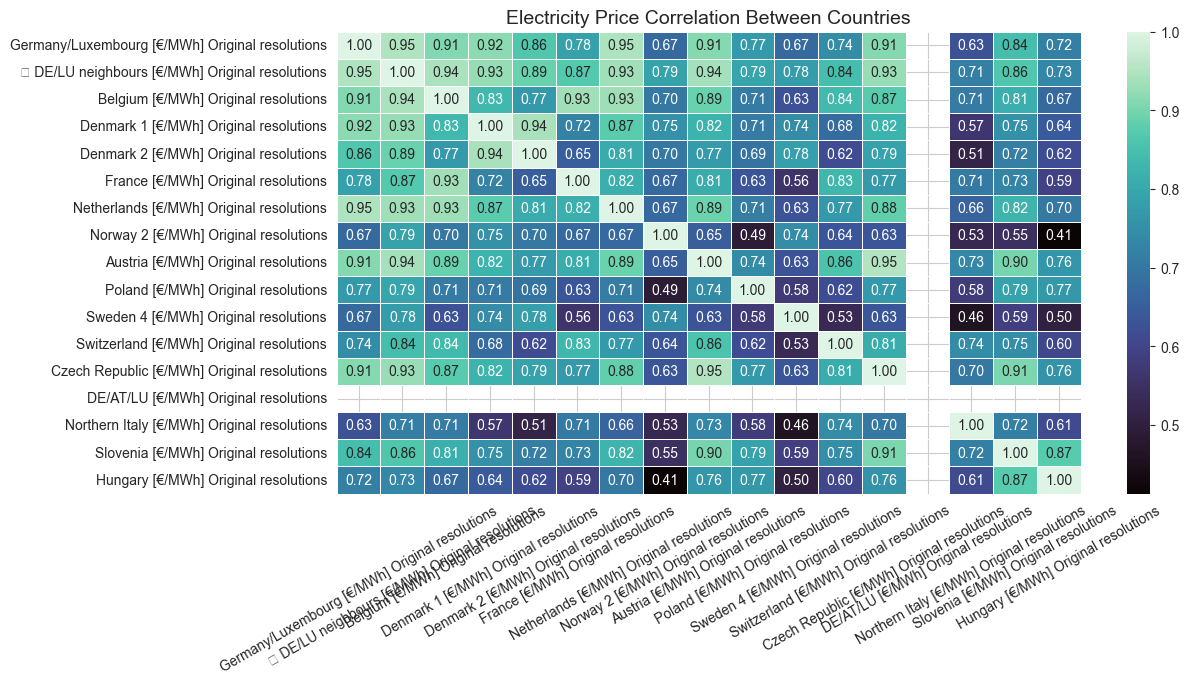

✅ Correlation heatmap saved as 'price_correlation_heatmap.png'.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# =========================
# 📌 Define Paths
# =========================
PLOTS_DIR = "../visualizations"
os.makedirs(PLOTS_DIR, exist_ok=True)  # Ensure directory exists

# =========================
# 📌 Load Dataset
# =========================
file_path = "../data/transformed/transformed_refined_Day-ahead_prices_202301010000_202503050000_Hour.csv"
df = pd.read_csv(file_path, delimiter=",")

# Convert time column to datetime
df["Start date"] = pd.to_datetime(df["Start date"], errors="coerce")

# =========================
# 📌 Select Price Columns
# =========================
price_columns = [col for col in df.columns if "€/MWh" in col]

# Convert price columns to numeric
df[price_columns] = df[price_columns].apply(pd.to_numeric, errors="coerce")

# Drop rows where all price values are NaN
df.dropna(subset=price_columns, how="all", inplace=True)

# =========================
# 📌 Compute Correlation Matrix
# =========================
corr_matrix = df[price_columns].corr()

# =========================
# 📌 Plot Heatmap
# =========================
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Cleaner grid style

sns.heatmap(corr_matrix, annot=True, cmap="mako", fmt=".2f", linewidths=0.5, cbar=True)

# =========================
# 📌 Labels, Title & Formatting
# =========================
plt.title("Electricity Price Correlation Between Countries", fontsize=14)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)

# =========================
# 📌 Save & Show Plot
# =========================
plot_filename = "price_correlation_heatmap.png"
plt.savefig(os.path.join(PLOTS_DIR, plot_filename), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print(f"✅ Correlation heatmap saved as '{plot_filename}'.")
